<a href="https://colab.research.google.com/github/mamadoufoune6-spec/Data-sciencePortfolio/blob/main/.Week1_Exoplanets_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load database from url
url = "https://raw.githubusercontent.com/OpenExoplanetCatalogue/oec_tables/refs/heads/master/comma_separated/open_exoplanet_catalogue.txt"
df = pd.read_csv(url)

#ensure table
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)
#Identify missing values
print(df.isna().sum())
# to ensure that empty space which should be numerical becaomes the float NaN
numeric_cols = ["binaryflag","mass","radius","period","semimajoraxis","eccentricity","periastron","longitude",
                "ascendingnode","inclination","temperature","age","lastupdate","system_distance",
                "hoststar_mass","hoststar_radius","hoststar_metallicity","hoststar_temperature","hoststar_age",]

for col in numeric_cols:
  df[col] = pd.to_numeric(df[col], errors="coerce")

#fillingvalues with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
print(df.head())

            name  binaryflag  mass  radius       period  semimajoraxis  \
0  Kepler-1032 b           0   NaN   0.167     3.290118            NaN   
1    HD 154857 b           0  2.24     NaN   408.600000          1.291   
2    HD 154857 c           0  2.58     NaN  3452.000000          5.360   
3   Kepler-994 b           0   NaN   0.143     1.151167            NaN   
4  Kepler-1350 b           0   NaN   0.225     4.496860            NaN   

   eccentricity  periastron  longitude  ascendingnode  ...  lastupdate  \
0           NaN         NaN        NaN            NaN  ...    16/05/10   
1          0.46        57.0        NaN            NaN  ...    14/01/25   
2          0.06       352.0        NaN            NaN  ...    14/01/25   
3           NaN         NaN        NaN            NaN  ...    16/05/10   
4           NaN         NaN        NaN            NaN  ...    16/05/10   

   system_rightascension  system_declination system_distance  hoststar_mass  \
0          19 19 43.4040      +

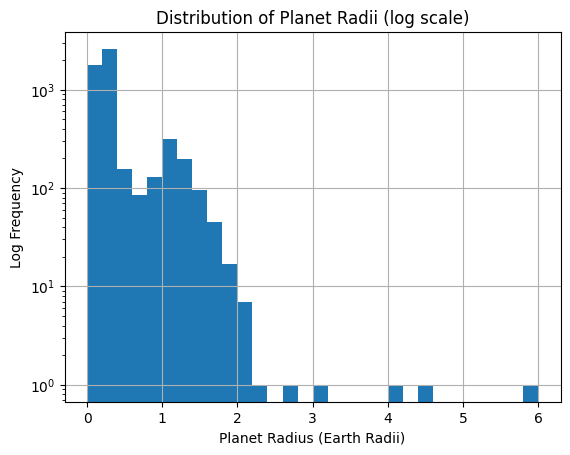

In [6]:
from logging import log
#EDA/plotting
import matplotlib.pyplot as plt
bins = np.arange(0, 6.2, 0.2)#better resolution
df['radius'].hist(bins=bins, log=True)
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Log Frequency')
plt.title('Distribution of Planet Radii (log scale)')
#plt.xlim(0,3)
plt.show()



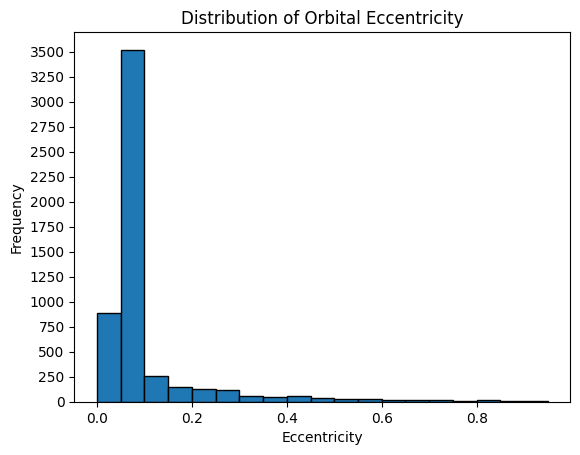

In [7]:
#Eccentricity
#define bins again
bins = np.arange(0, 1, 0.05)
#plot histogram
plt.yticks(np.arange(0, 3750, 250))
plt.hist(df['eccentricity'],bins=bins, edgecolor="black" )
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.title('Distribution of Orbital Eccentricity')
plt.show()

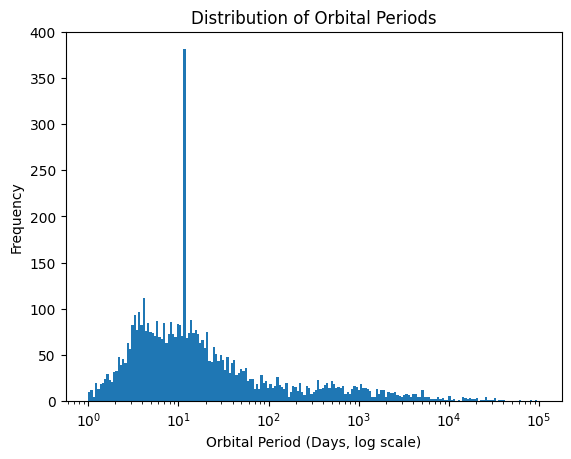

In [8]:
#Orbital period
bins = np.logspace(0, 5,200)
plt.hist(df['period'], bins=bins)
plt.xscale('log')
plt.xlabel('Orbital Period (Days, log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Orbital Periods')
plt.show()
#

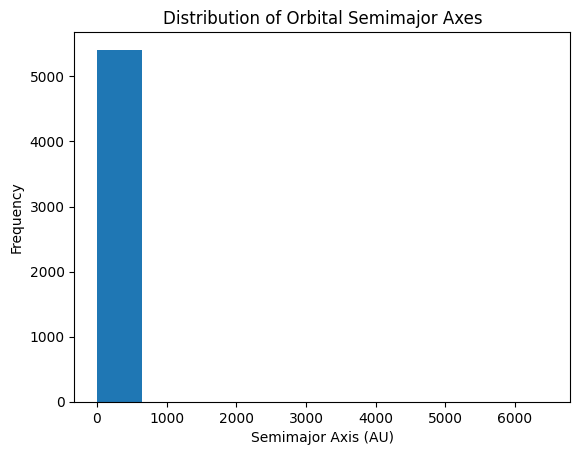

In [15]:
#Semimajor axis - Histograam of orbital distance
import matplotlib.pyplot as plt
plt.hist(df['semimajoraxis'], bins=10)
plt.xlabel('Semimajor Axis (AU)')
plt.ylabel('Frequency')
plt.title('Distribution of Orbital Semimajor Axes')
plt.show()

                      binaryflag      mass    radius    period  semimajoraxis  \
binaryflag              1.000000  0.106448  0.049032  0.001298      -0.002046   
mass                    0.106448  1.000000  0.089815  0.021308       0.062995   
radius                  0.049032  0.089815  1.000000  0.052202       0.028405   
period                  0.001298  0.021308  0.052202  1.000000       0.025665   
semimajoraxis          -0.002046  0.062995  0.028405  0.025665       1.000000   
eccentricity            0.000488  0.004313 -0.006090 -0.000112      -0.000419   
periastron             -0.006051  0.034128 -0.010297 -0.000433      -0.000608   
longitude              -0.000143  0.000035 -0.006420  0.002308       0.001415   
ascendingnode           0.034281  0.218814 -0.011467  0.007278       0.004462   
inclination             0.022478  0.087332 -0.061854  0.004727       0.003202   
temperature             0.030860  0.048348  0.415619  0.038396       0.039937   
age                     0.10

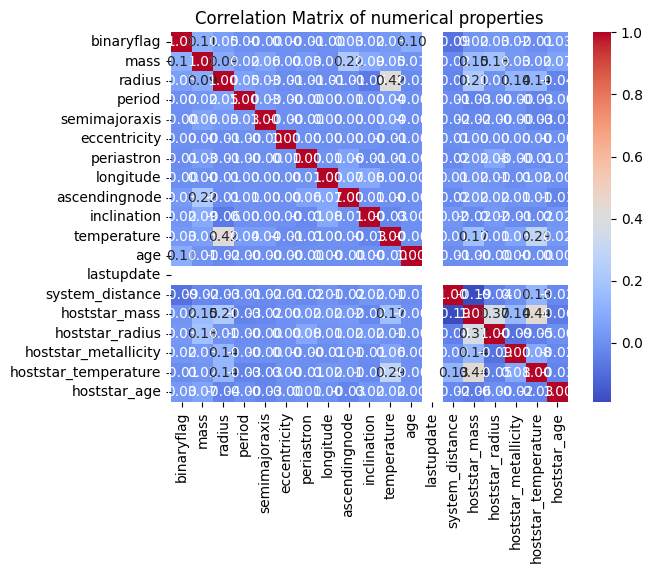

In [18]:
#Correlation Analysis
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of numerical properties')
plt.show()
#
#

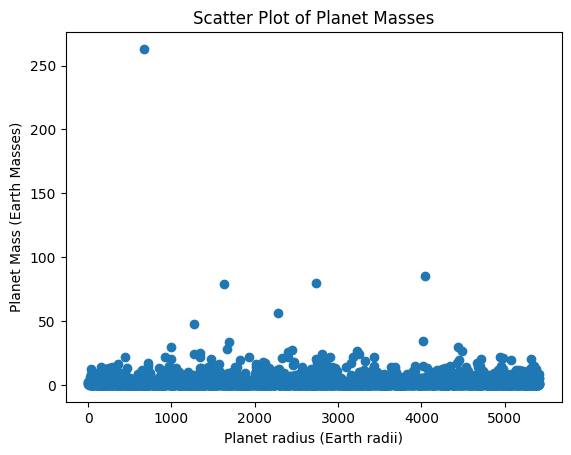

In [12]:
#Planet Mass - scatter graph of planet masses
plt.scatter(df.index, df['mass'], alpha=1)
plt.xlabel('Planet radius (Earth radii)')
plt.ylabel('Planet Mass (Earth Masses)')
plt.title('Scatter Plot of Planet Masses')
plt.show()
#

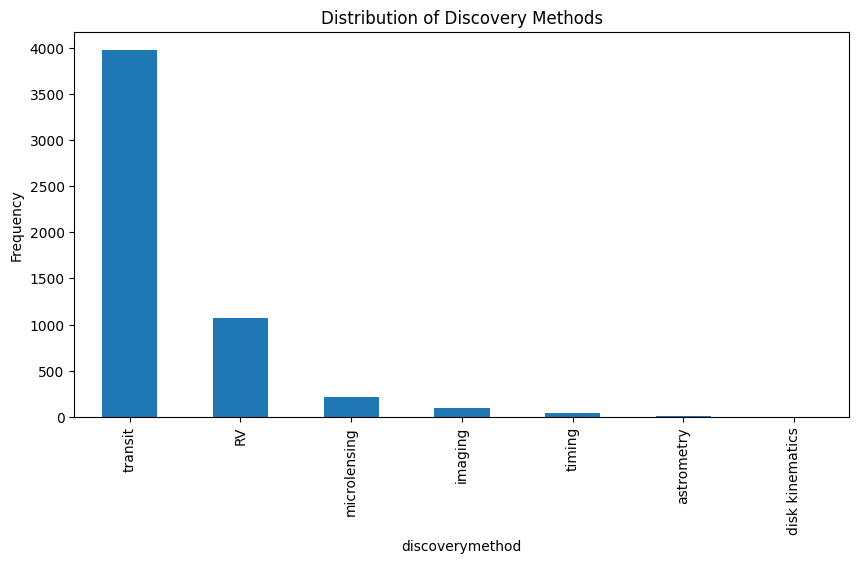

In [19]:
#Discovery Methods
df['discoverymethod'].value_counts().plot(kind='bar', figsize=( 10,5))
plt.ylabel('Frequency')
plt.title('Distribution of Discovery Methods')
plt.show()
#

            name  binaryflag   mass   radius       period  semimajoraxis  \
0  Kepler-1032 b           0  0.463  0.16700     3.290118         0.1172   
1    HD 154857 b           0  2.240  0.22047   408.600000         1.2910   
2    HD 154857 c           0  2.580  0.22047  3452.000000         5.3600   
3   Kepler-994 b           0  0.463  0.14300     1.151167         0.1172   
4  Kepler-1350 b           0  0.463  0.22500     4.496860         0.1172   

   eccentricity  periastron   longitude  ascendingnode  ...  lastupdate  \
0          0.08      120.26  181.979708         63.285  ...         NaN   
1          0.46       57.00  181.979708         63.285  ...         NaN   
2          0.06      352.00  181.979708         63.285  ...         NaN   
3          0.08      120.26  181.979708         63.285  ...         NaN   
4          0.08      120.26  181.979708         63.285  ...         NaN   

   system_rightascension  system_declination system_distance  hoststar_mass  \
0          19

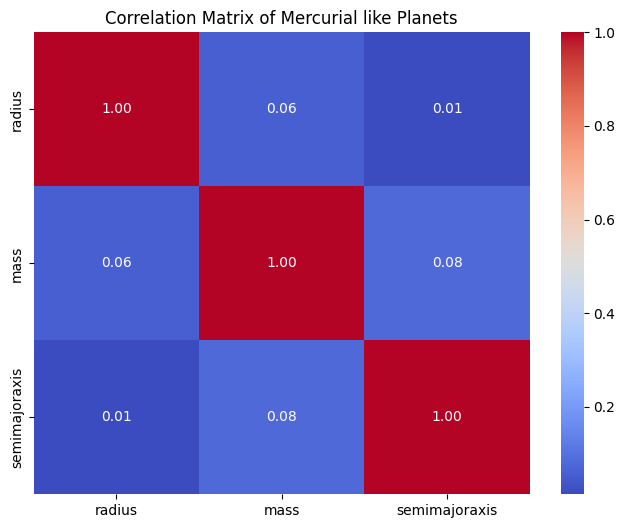

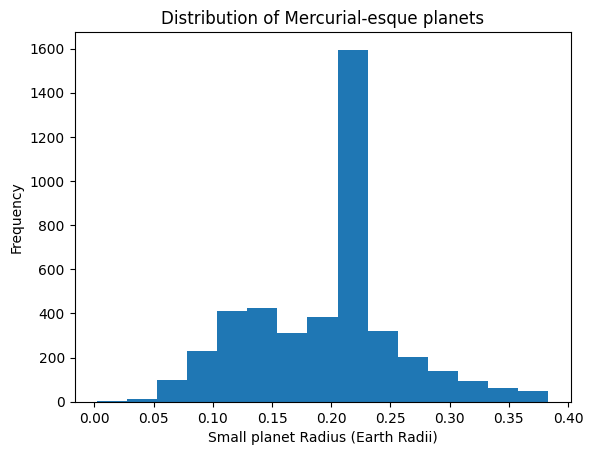

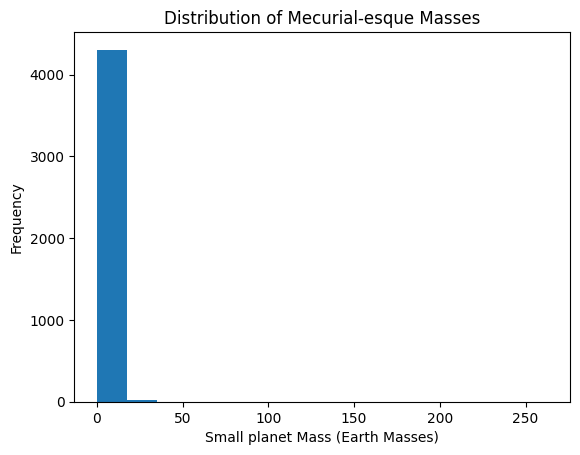

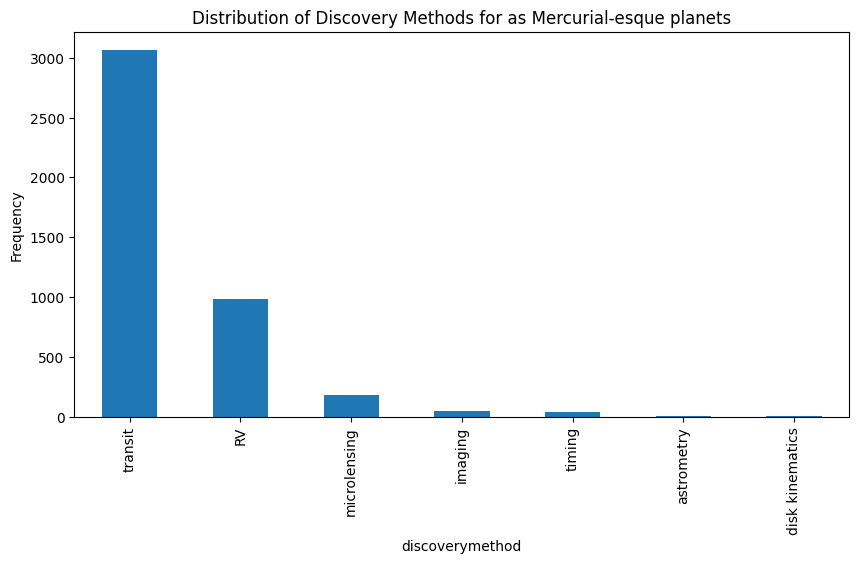

In [30]:
#Filtering Gas Giants
Small_Rocky_Planet = df[df["radius"]<=0.383]
print(Small_Rocky_Planet.head())
#correlationary Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(Small_Rocky_Planet[["radius","mass","semimajoraxis"]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mercurial like Planets')
plt.show()

#Distrubtion plots
#radius
plt.hist(Small_Rocky_Planet['radius'], bins=15)
plt.xlabel('Small planet Radius (Earth Radii)')
plt.ylabel('Frequency')
plt.title('Distribution of Mercurial-esque planets')
plt.show()
#mass
plt.hist(Small_Rocky_Planet['mass'], bins=15)
plt.xlabel('Small planet Mass (Earth Masses)')
plt.ylabel('Frequency')
plt.title('Distribution of Mecurial-esque Masses')
plt.show()

#Discovery Methods
Small_Rocky_Planet['discoverymethod'].value_counts().plot(kind='bar', figsize=( 10,5))
plt.ylabel('Frequency')
plt.title('Distribution of Discovery Methods for as Mercurial-esque planets')
plt.show()